## Data Visualization for  A decade of population change in Alabama (2010 - 2020).
#### The original data from the US Census Bureau is in CSV format. The data set is transformed with the merge function in pandas to join the data set with a county polygon shapefile. Dataframes merged on county names. However, these columns need data cleaning before the merging. 
[Link - This ArcGIS online web map illustrates the same dataset with interactive controls](https://www.arcgis.com/apps/Compare/index.html?appid=ada5ce12a8f2409e87e5eb8f446dce01)

In [1]:
# imports
from osgeo import ogr
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec
import sys

# copy warning avoid
#pd.options.mode.chained_assignment = None

In [2]:
# read the shape file
fn = r'input/alabama.shp'
# read shape file
alabama_shp = gpd.read_file(fn)
# drop unwanted columns in geodata frame
alabama_shp = alabama_shp.drop(columns=['OBJECTID', 'Permanent_', 'Source_Fea', 'Source_Dat', 'Source_D_1',
       'Source_Ori', 'Data_Secur', 'Distributi', 'LoadDate', 'FCode',
       'State_FIPS','County_FIP','StCo_FIPSC',
       'Population', 'AreaSqKM', 'GNIS_ID', 'Shape_Leng', 'Shape_Area'])
alabama_shp.sort_values(by='County_Nam').head()
print(alabama_shp.head())
print(alabama_shp.columns)

# read popluation data file
pop_df = pd.read_csv('population_data.csv')
#print(pop_df.columns)
pop_alabama = pop_df[pop_df.STNAME=='Alabama']
# make a copy of data frame
alba_df = pop_alabama.copy()
#pop_alabama.drop([0], axis=0, inplace=True)
#len(pop_alabama)
alba_df.drop(alba_df.index[0],inplace=True)
# drop unwanted columns
alba_df = alba_df[['STNAME', 'CTYNAME','POPESTIMATE2010','POPESTIMATE2020']]
#print(alba_df.head())
# create a new county name column to join based on
county_list = alba_df['CTYNAME'].to_list()
county_list = [item.split()[:-1] for item in county_list]
county_list = [' '.join(item) for item in county_list]
alba_df['County_Nam'] = county_list
# join tables
alba_gdf = alabama_shp.merge(alba_df, left_on='County_Nam', right_on='County_Nam', suffixes=('_left', '_right'))
# calculations for change and %
alba_gdf['change'] = alba_gdf.POPESTIMATE2010 - alba_gdf.POPESTIMATE2020
alba_gdf['percentage'] = (alba_gdf.change/alba_gdf.POPESTIMATE2010)* 100
alba_gdf.head()


  State_Name County_Nam                                           geometry
0    Alabama    Choctaw  POLYGON ((-88.44169 32.14641, -88.44168 32.146...
1    Alabama     Etowah  POLYGON ((-86.19772 34.17784, -86.19691 34.178...
2    Alabama    Baldwin  POLYGON ((-87.99068 30.55549, -87.99051 30.560...
3    Alabama      Lamar  POLYGON ((-88.24154 33.80296, -88.24147 33.803...
4    Alabama       Dale  POLYGON ((-85.51873 31.61953, -85.51262 31.619...
Index(['State_Name', 'County_Nam', 'geometry'], dtype='object')


,State_Name,County_Nam,geometry,STNAME,CTYNAME,POPESTIMATE2010,POPESTIMATE2020,change,percentage
0,Alabama,Choctaw,"POLYGON ((-88.44169 32.14641, -88.44168 32.146...",Alabama,Choctaw County,13848,12418,1430,10.326401
1,Alabama,Etowah,"POLYGON ((-86.19772 34.17784, -86.19691 34.178...",Alabama,Etowah County,104440,102371,2069,1.981042
2,Alabama,Baldwin,"POLYGON ((-87.99068 30.55549, -87.99051 30.560...",Alabama,Baldwin County,183121,229287,-46166,-25.210653
3,Alabama,Lamar,"POLYGON ((-88.24154 33.80296, -88.24147 33.803...",Alabama,Lamar County,14496,13764,732,5.049669
4,Alabama,Dale,"POLYGON ((-85.51873 31.61953, -85.51262 31.619...",Alabama,Dale County,50396,48959,1437,2.851417


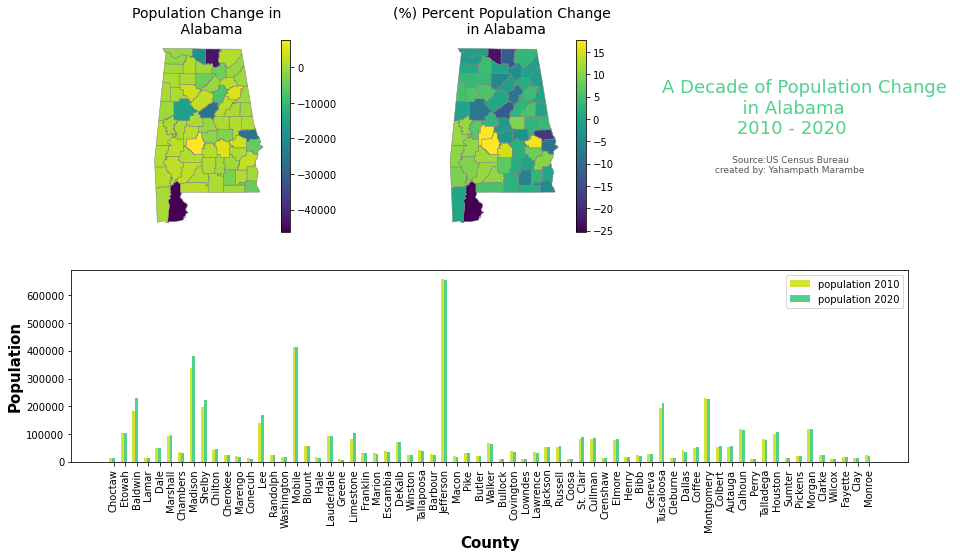

In [3]:
# create object
fig = plt.figure(figsize=[15,12])
gs = GridSpec(3,3, figure=fig)
# subplots
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
# for bar graph
ax3 = fig.add_subplot(gs[1,:])
# plot geopanda data frames
alba_gdf.plot(column= 'change', ax=ax1, legend=True,
             linewidth=0.5, edgecolor='grey')
alba_gdf.plot(column= 'percentage', ax=ax2, legend=True,
             linewidth=0.5, edgecolor='grey')
# title
ax1.set_title('Population Change in \n Alabama',
             fontdict={
                 'fontsize':'14',
                 'fontweight': '3'
             })

ax2.set_title('(%) Percent Population Change \n in Alabama',
             fontdict={
                 'fontsize':'14',
                 'fontweight':'3'
             })
# plotting bar chart
# drop columns
draw_df = alba_gdf[['County_Nam', 'POPESTIMATE2010', 'POPESTIMATE2020']]
# set width of bar
barWidth = 0.25
# set height of bar
pop_10 = alba_gdf.POPESTIMATE2010
pop_20 = alba_gdf.POPESTIMATE2020
# Set position of bar on X axis
br1 = np.arange(len(pop_10))
br2 = [x + barWidth for x in br1]
#
ax3.bar(br1, pop_10, color ='#d1e334', width = barWidth,
        #edgecolor ='grey',
        label ='population 2010')
ax3.bar(br2, pop_20, color ='#52d18b', width = barWidth,
        #edgecolor ='grey',
        label ='population 2020')
# Adding Xticks
plt.xlabel('County', fontweight ='bold', fontsize = 15)
plt.ylabel('Population', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(pop_10))],
        list(alba_gdf.County_Nam), rotation=90, fontweight=15)
# plot legend
plt.legend()
# for Annotations
ax4 = fig.add_subplot(gs[0,2])
#annotation
ax4.annotate('A Decade of Population Change \n              in Alabama\n             2010 - 2020', xy=(0, 0.8),
            horizontalalignment='left', verticalalignment='top',
            fontsize=18, color='#52d18b')

ax4.annotate('       Source:US Census Bureau \n created by: Yahampath Marambe', xy=(0.2, 0.4),
            horizontalalignment='left', verticalalignment='top',
            fontsize=9, color='#555555')

# axis off
ax1.set_axis_off()
ax2.set_axis_off()
ax4.set_axis_off()
# show the plot
plt.savefig('map.png', transparent=False, facecolor='white', dpi=300)
plt.show()